<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.891 · Aprendizaje automático · PEC1</p>
<p style="margin: 0; text-align:right;">2024-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div style="text-align: center; font-size: 36px; font-weight: bold;">
  PEC 1: Preparación de datos
</div>

El objetivo principal de esta primera PEC es que os familiaricéis con el entorno de trabajo que utilizaréis en el resto de prácticas de la asignatura. Dicho entorno estará formado por un conjunto de dependencias relativas a ciertos módulos de Python que serán necesarios para poder ejecutar de forma correcta vuestra PEC. Estas dependencias las gestionaremos gracias a la ayuda de Anaconda. Otra de las herramientas fundamentales del que será vuestro nuevo entorno de trabajo será Jupyter, que os permitirá trabajar con Notebooks (ficheros *.ipynb) como el presente enunciado.

Otro de los aspectos más importantes que cubriremos en esta primera PEC, tal y como adelanta su título, es el de la preparación de los datos. En esta PEC aprenderemos a cargar un conjunto de datos o _dataset_ y nos ayudaremos de herramientas de visualización para comprender mejor cómo se distribuye el dato de cara a entender cómo podemos sacarle partido. Además, nos habituaremos a trabajar con conjuntos de entrenamiento y test para confirmar si las conclusiones que sacamos sobre una parte de las muestras se pueden generalizar y extrapolar al resto.

En resumen, en esta práctica veremos cómo aplicar diferentes técnicas para la carga y preparación de datos siguiendo los pasos listados a continuación:
1. Carga de un conjunto de datos (1 punto)
2. Análisis de los datos (2.5 puntos)
<br>   2.1. Análisis estadístico básico
<br>   2.2. Análisis exploratorio de los datos
3. Preprocesado de los datos (1.5 puntos)
4. Reducción de la dimensionalidad (2.5 puntos)
5. Conjuntos desbalanceados de datos (2.5 puntos)
<br>   5.1. Oversampling

**Importante:** cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** la solución planteada no debe utilizar métodos, funciones o parámetros declarados "deprecated" en futuras versiones.

**Importante:** no olvidéis poner vuestro nombre y apellidos en la siguiente celda.

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos:</strong>
</div>

In [ ]:
#Álvaro Loarte Rodríguez

In [ ]:
#Para la realización de la práctica necesitaremos importar los siguientes módulos:

In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline



# Carga del conjunto de datos (1 punto)

A lo largo de toda la PEC trabajaremos con el conjunto de datos llamado _Bank Marketing_, que es uno de los _datasets_ disponibles en el [Repositorio de Apdendizaje automático de la Universidad de California en Irvine](https://archive.ics.uci.edu/).

En el enlace [https://archive.ics.uci.edu/dataset/222/bank+marketing] tenéis disponible tanto el mencionado conjunto de datos _Bank Marketing_ como toda la información relevante necesaria para comprender mejor con qué tipo de dato vamos a trabajar. En resumen, los datos de este _dataset_ están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo que se busca en este conjunto de datos es el de predecir si el cliente contratará un depósito a plazo o no (variable _y_).

En primer lugar, deberéis cargar en el Notebook el conjunto de datos con el que trabajaremos durante el resto de la PEC. Para ello, podéis descargarlo manualmente del enlace referido previamente, aunque os aconsejamos que instaléis y utilicéis el módulo _ucimlrepo_ tal y como se explica en la propia página del _dataset_.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Bank Marketing" y mostrad:

<ul>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo "y").</li>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas.</li>
</ul>

Sugerencia: si usáis ucimlrepo, explorad los atributos _metadata_ y _variables_ del objeto obtenido.
    
Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo), aunque quizá pueda serte de utilidad en algún punto tenerlos también en un único DataFrame combinados.
</div>

In [46]:
from ucimlrepo import fetch_ucirepo 

# Cargo el dataset según lo proporcionado en la misma web del conjunto de datos:
bank_marketing = fetch_ucirepo(id=222) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

# 1.1: Utilizando el dataframe .variables me quedo solamente con aquellas con el rol de feature para sacar su información
df_feature = bank_marketing.variables[bank_marketing.variables['role'] == 'Feature']
print(f"\nLas {len(df_feature)} columnas que contienen atributos descriptivos son las siguientes:")
print(', '.join(df_feature['name'])) 

# 1.2: A través del dataframe .data.features (o el de data.targets) puedo sacar por su tamaño el numero de muestras.
print(f"\nEl número de muestras del conjunto de datos es de {len(X)}")

# 1:3: Consultando bank_marketing.varaibles se nos indica si una variable puede contener valores vacíos.
df_feature_missing_values = bank_marketing.variables[bank_marketing.variables['missing_values'] == 'yes']
print("\nLas variables (columnas) que tienen missing values son:")
print(', '.join(df_feature_missing_values['name']))


Las 16 columnas que contienen atributos descriptivos son las siguientes:
age, job, marital, education, default, balance, housing, loan, contact, day_of_week, month, duration, campaign, pdays, previous, poutcome

El número de muestras del conjunto de datos es de 45211

Las variables (columnas) que tienen missing values son:
contact, pdays, poutcome


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿el conjunto de datos propuesto es un problema de aprendizaje automático supervisado o no?, en el caso de serlo, ¿de qué tipo de aprendizaje supervisado estaríamos hablando?

# 1.4 
El conjunto de datos es supervisado, ya que se nos proporcionan datos etiquetados. La columna Y sería el resultado conocido para cada observación (el resto de columnas). Es posible, por tanto, partir de este conjunto de datos etiquetados para evaluar la obtención de un resultado binario sobre si cada usuario ha suscrito un depósito a plazos).

Sería un tipo de aprendizaje automático supervisado de clasificación, ya que el atributo objetivo es categórico y binario (se clasifica cada observación en si el cliente ha contratado el depósito)

# Análisis de los datos (2.5 puntos)

En este apartado visualizaremos cada una de las columnas o _features_ del dato para comprender mejor qué distribución tiene.

## Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculad la frecuencia.</li>
      <li>Haced un gráfico de barras para cada variable.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Haced un histograma para cada variable.</li>
    </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de <i>matplotlib</i>.
</div>


 DATOS DE VARIABLES CATEGÓRICAS: 


 -Los datos de la variable categórica 'job' se presentan a continuación.
Frecuencia de cada valor:

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288

Gráfico de barras:


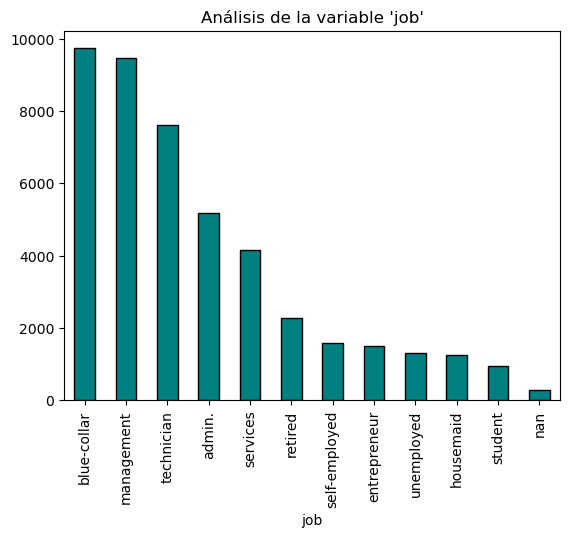


 -Los datos de la variable categórica 'marital' se presentan a continuación.
Frecuencia de cada valor:

married     27214
single      12790
divorced     5207

Gráfico de barras:


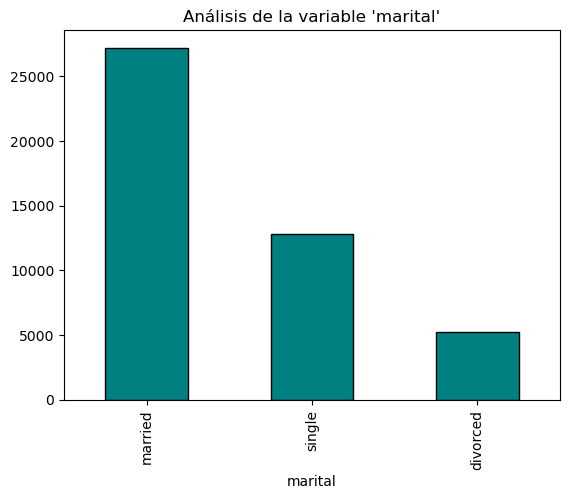


 -Los datos de la variable categórica 'education' se presentan a continuación.
Frecuencia de cada valor:

secondary    23202
tertiary     13301
primary       6851
NaN           1857

Gráfico de barras:


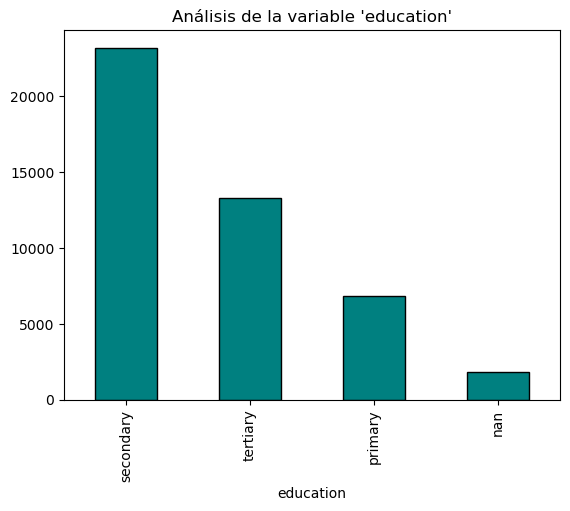


 -Los datos de la variable categórica 'contact' se presentan a continuación.
Frecuencia de cada valor:

cellular     29285
NaN          13020
telephone     2906

Gráfico de barras:


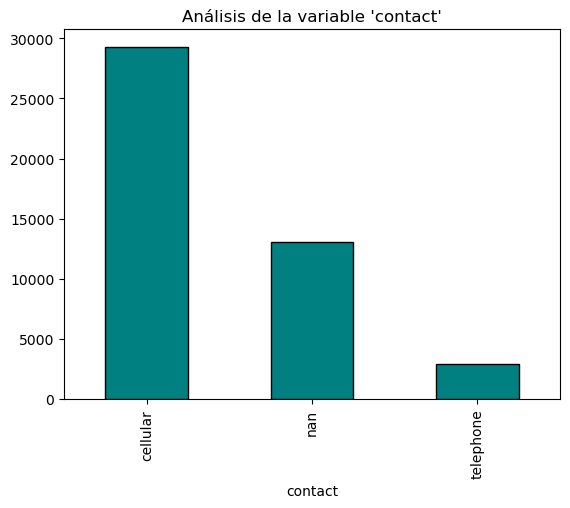


 -Los datos de la variable categórica 'poutcome' se presentan a continuación.
Frecuencia de cada valor:

NaN        36959
failure     4901
other       1840
success     1511

Gráfico de barras:


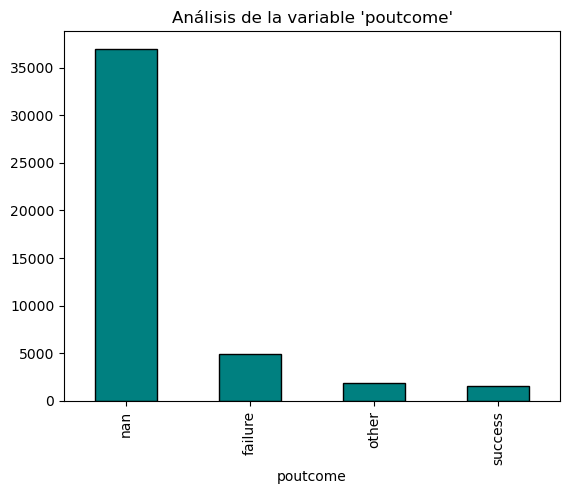


 DATOS DE VARIABLES NUMÉRICAS: 


 -Los datos de la variable numérica 'age' se presentan a continuación.
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000


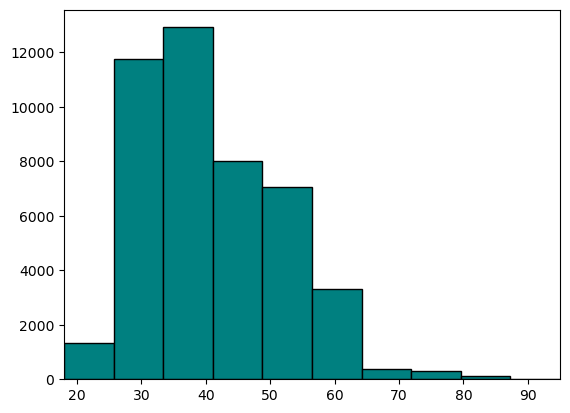


 -Los datos de la variable numérica 'balance' se presentan a continuación.
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000


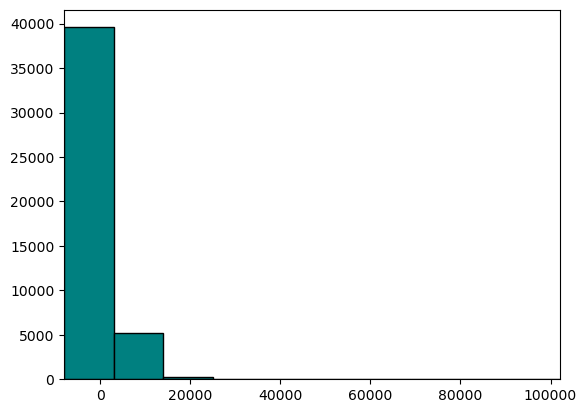


 -Los datos de la variable numérica 'duration' se presentan a continuación.
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000


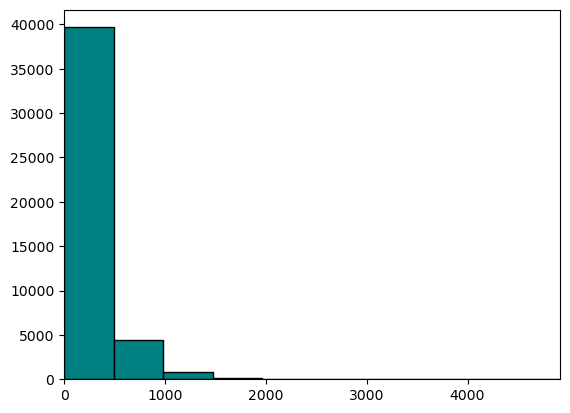


 -Los datos de la variable numérica 'campaign' se presentan a continuación.
count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000


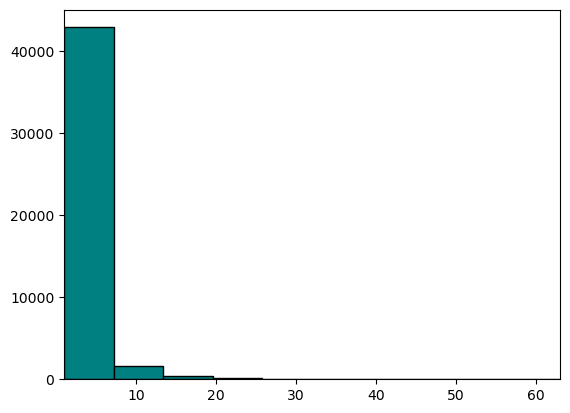


 -Los datos de la variable numérica 'pdays' se presentan a continuación.
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000


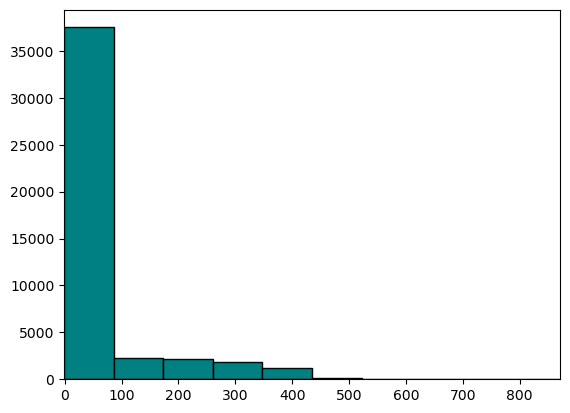


 -Los datos de la variable numérica 'previous' se presentan a continuación.
count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000


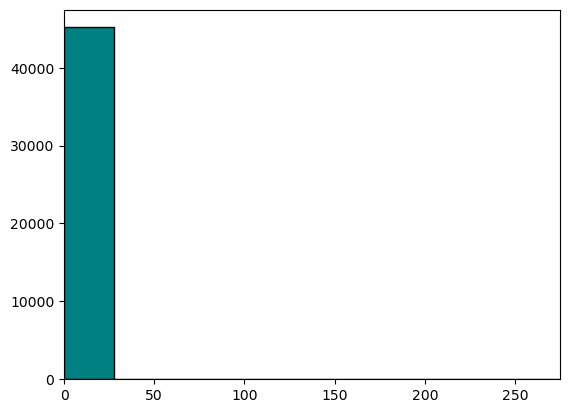

In [223]:
# 3.1: Extraigo dos dataframes divididos por el tipo de variable (categórico y numérico)
df_categoric_variables = bank_marketing.variables[bank_marketing.variables['type'] == 'Categorical']
df_numerical_variables = bank_marketing.variables[bank_marketing.variables['type'] == 'Integer']

def plot_bar_graph(categoric_var_name: str):
    X[categoric_var_name].value_counts(dropna=False).plot(kind='bar', color='teal',edgecolor='black')
    plt.title(f"Análisis de la variable '{categoric_var_name}'")
    plt.show() 
    
def plot_histogram(categoric_var_name: str, min_value:int, max_value:int):
    plt.xlim(min_value, max_value) 
    plt.hist(X[categoric_var_name], bins=10, color='teal', edgecolor='black')  
    plt.show() 
    
def print_categoric_var_data(categoric_var_name: str):
    print(f"\n -Los datos de la variable categórica '{categoric_var_name}' se presentan a continuación.")
    print(f"Frecuencia de cada valor:\n")
    # Extraigo el conteo de cada variable categórica
    counts = X[categoric_var_name].value_counts(dropna=False)
    # Lo imprimo dejando slo los valores que interesan
    print(counts.to_string(index=True, header=False)) 
    print(f"\nGráfico de barras:")
    plot_bar_graph(categoric_var_name)
    
def print_numeric_var_data(numeric_var_name: str):
    print(f"\n -Los datos de la variable numérica '{numeric_var_name}' se presentan a continuación.")
    var_summary = X[numeric_var_name].describe()
    print(var_summary.to_string(index=True, header=False))
    plot_histogram(numeric_var_name,var_summary.loc['min'],var_summary.loc['max'])

# Itero cada uno de los nombres de las variables categóricas para mostrar la información pedida usando la función print_categoric_var_data
print("\n DATOS DE VARIABLES CATEGÓRICAS: \n")
for var in df_categoric_variables['name']:
    print_categoric_var_data(var)

# Itero cada uno de los nombres de las variables numéricas para mostrar la información pedida usando la función print_numeric_var_data
print("\n DATOS DE VARIABLES NUMÉRICAS: \n")
for var in df_numerical_variables['name']:
    print_numeric_var_data(var)



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

Si dividimos el analisis en variables categóricas y numéricas:
 - Variables categóricas. Lo primero que observamos es lo que ya sabiamos previamente: hay ciertas variables con valores vacíos. En concreto 'poutcome' tiene un elevadísimo número de valores vacíos o nulos. Lo mismo, aunque menos exagerado ocurre con 'contact'. Otro dato bastante importante es que en torno al 50% de los clientes consultados están casados y aproximadamente la misma proporción han cursado estudios secundarios.
 - Variables numéricas: Lo más claro se ve con la variable 'age', donde apreciamos que casi toda la muestra se concentra entre los 25 y los 55-60 años, siendo más frecuentes la el periodo entre los 25 y los 40 años. También vemos que en ciertas variables como 'balance' la dispersión de los datos es enorme, teniendo valores atípicos como el máximo de 102127 que desvían la media.

## Análisis exploratorio de los datos

En este subapartado exploraremos gráficamente la relación de los atributos descriptivos con la variable objetivo y analizaremos las diferentes correlaciones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando una librería gráfica, como por ejemplo <i>matplotlib</i>, para cada una de las variables categóricas, superponed en un mismo gráfico el diagrama de barras para cada posible valor de la variable objetivo, diferenciando con distinto color según el valor de "y", es decir, cuando sea "no" o cuando sea "yes". Añadid una leyenda para saber a qué clase corresponde cada histograma.
    
La finalidad es observar cómo se distribuye cada uno de los atributos en función de la clase que tengan, para poder identificar de manera visual y rápida si algunos atributos nos permiten predecir mejor que otros el valor de la variable objetivo.
    
<hr>
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los dos histogramas.
</div>

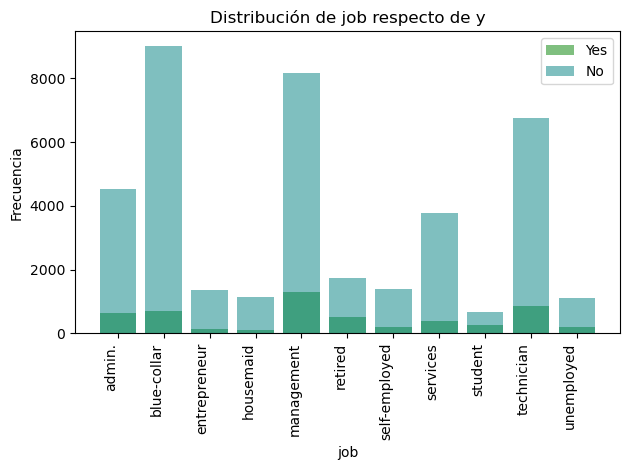

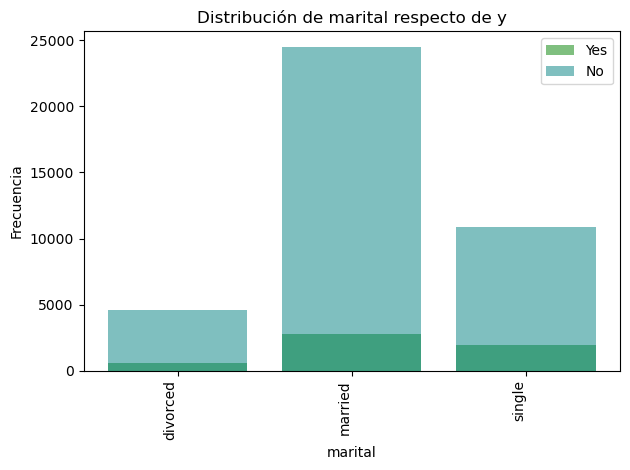

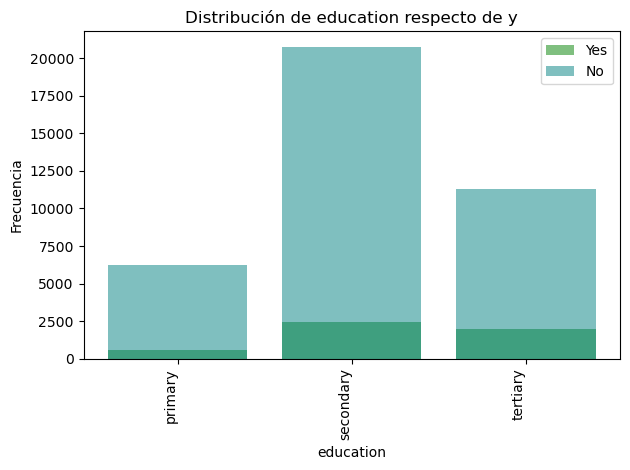

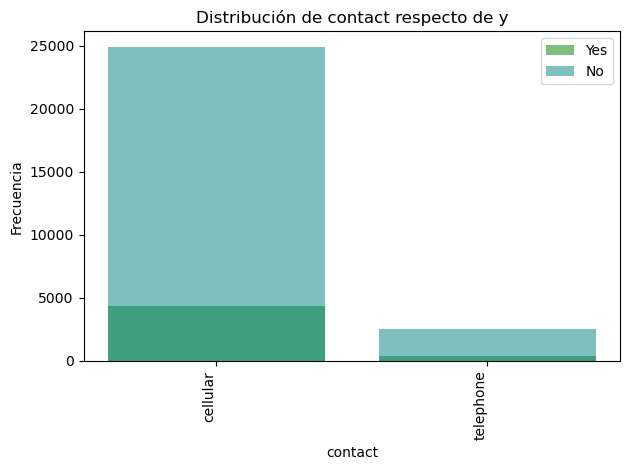

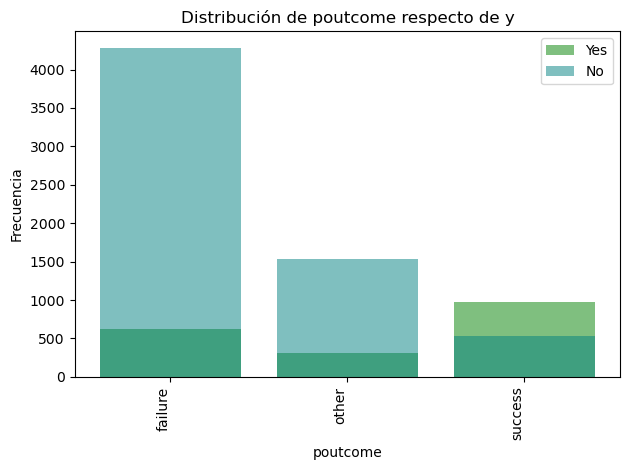

In [230]:
# 3.2: Junto los dataframes de las variables observadas y los resultados en uno para poder agrupar
total_dataset = pd.concat([X, y], axis=1)

def plot_categorical_distribution_y(categoric_var_name:str):
    # Agrupo entre la variable que nos interesa e 'y'. Una vez agrupados, realizamos el conteo (size() y trasponemos los resultados para visualizarlos)
    grouped_dataset = total_dataset.groupby([categoric_var_name, 'y']).size().unstack(fill_value=0)

    # Con esto creamos índices para el gráfico
    x = np.arange(len(grouped_dataset))
    # Y dibujamos cada uno de los gráficos superponiéndolos
    plt.bar(x , grouped_dataset['yes'], color='green', alpha=0.5, label='Yes')
    plt.bar(x , grouped_dataset['no'], color='teal', alpha=0.5, label='No')

    # Añado la leyuenda y muestro el gráfico de barras
    plt.xticks(x, grouped_dataset.index, rotation=90, ha='right')
    plt.title(f'Distribución de {categoric_var_name} respecto de y')
    plt.xlabel(categoric_var_name)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()  
    plt.show()

# Itero cada uno de los nombres de las variables numéricas para mostrar el gráfico pedido usando la función plot_categorical_distribution_y
for var in df_categoric_variables['name']:
    plot_categorical_distribution_y(var)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> de la misma forma que en el ejercicio anterior, superponed los histogramas para los distintos valores de "y" para cada variable numérica.

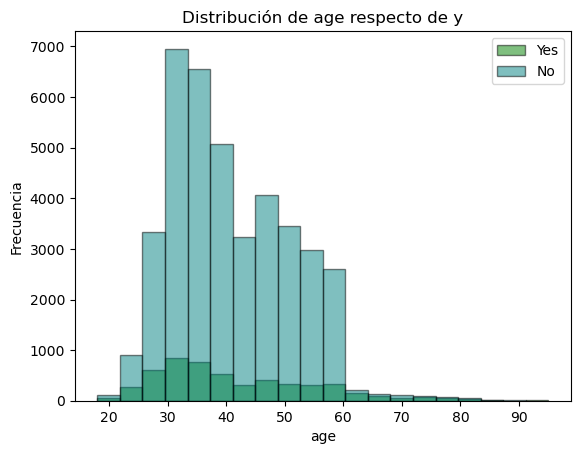

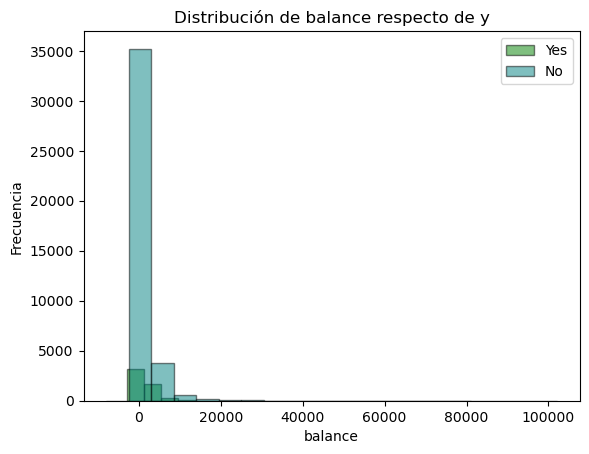

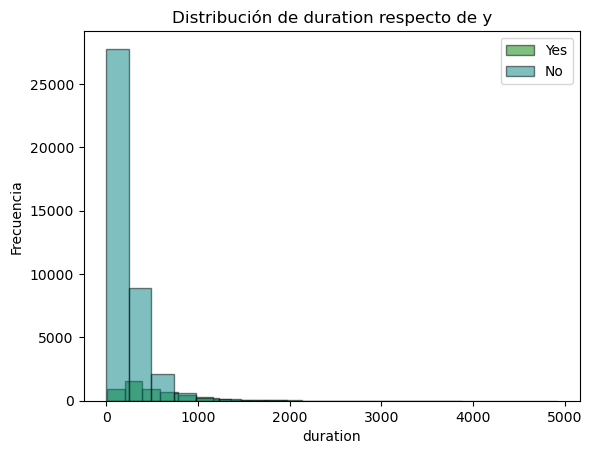

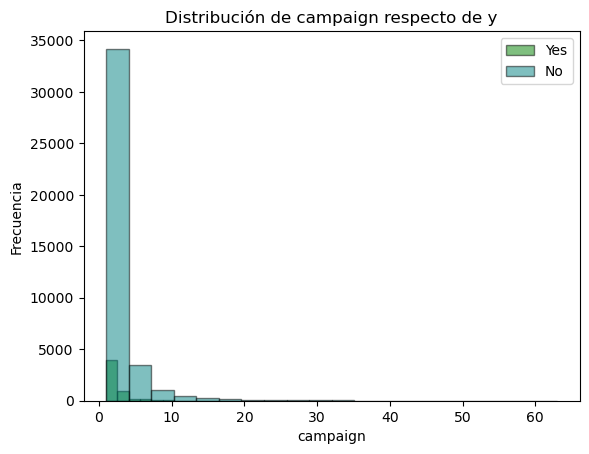

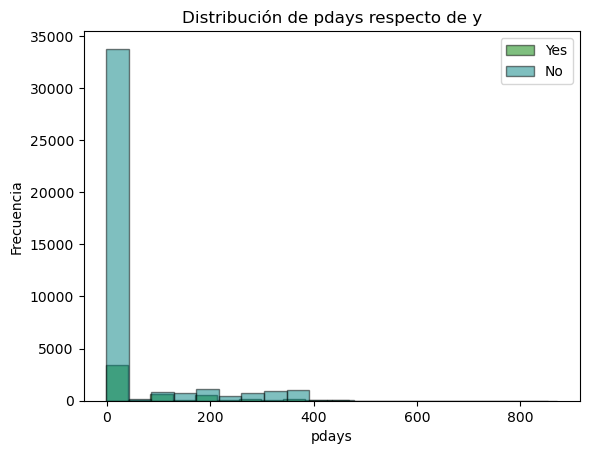

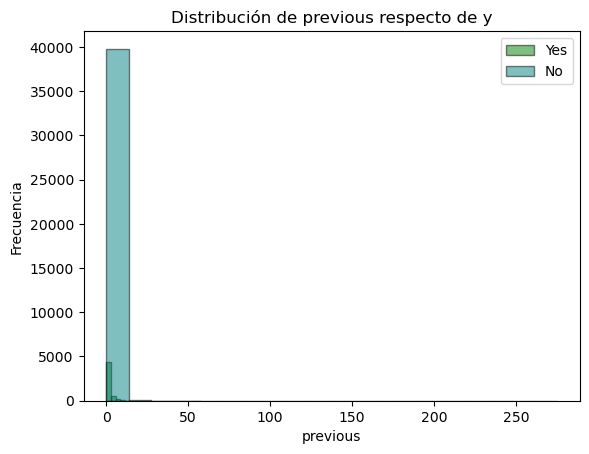

In [215]:
# Divido el dataset total en dos conjuntos utilizando el previo total_dataset, los que tienen respuesta 'yes' para la columna 'y' y los que tienen 'no'
total_dataset_yes = total_dataset[total_dataset['y'] == 'yes']
total_dataset_no = total_dataset[total_dataset['y'] == 'no']

def plot_categorical_distribution_y(categoric_var_name: str):
    # Plotear los histogramas superpuestos
    plt.hist(total_dataset_yes[categoric_var_name], bins=20, alpha=0.5, color='green', label='Yes', edgecolor='black')
    plt.hist(total_dataset_no[categoric_var_name], bins=20, alpha=0.5, color='teal', label='No', edgecolor='black')
    
    # Añado la leyuenda y muestro el gráfico de barras
    plt.title(f"Distribución de {categoric_var_name} respecto de y")
    plt.xlabel(categoric_var_name)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

# Itero cada uno de los nombres de las variables numéricas para mostrar el gráfico pedido usando la función plot_categorical_distribution_y
for var in df_numerical_variables['name']:
    plot_categorical_distribution_y(var)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los gráficos de barras y los histogramas, ¿qué atributos parecen tener más peso a la hora de predecir si se contratara un depósito a plazo o no? ¿Crees que con estos atributos será suficiente para poder determinar si se contratará o no el depósito?
</div>

Los atributos que, antes de calcular la correlación, me parece que pueden ayudar a determinar si se contrata o no el depósito son:
 - Age: Parece que hay ciertas edades que son mas dadas a contratar el depósito.
 - Job: Se ven trabajos donde se disparan los sies.
 - Contact: El contactar via movil parece que también puede inclinar a la contratacion.

No, a simple vista y con mis conocimientos puedo discriminar estas tres variables, pero hasta no hacer un análisis de la correlación entre variables no podre determinar mejor cuales se podrán acercar a ser suficientes para determinar la contatación del depósito.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre las variables numéricas.
</div>

In [239]:
dataset_numeric_columns = X[['age','balance','duration','campaign','pdays','previous']]
correlation_matrix = dataset_numeric_columns.corr()
print(correlation_matrix)


               age   balance  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comenta los resultados.
</div>

Puesto que el resultado de .corr() devuelve en valores cercanos a 0 lo que NO tiene correlación, a -1 lo que tiene correlación negativa y a 1 positiva, podemos ver que el valor más alto lo encontramos entre pdays y previous que es de 0.4548. Esto implica que hay una correlación moderada entre ambas variables.
Atendiendo al resto de ellas, hay correlaciones muy bajas, pero destacan como posibles variables correladas campaing y duration (-0,0846), pdays y campaign (-0,0886), age y balance (0.0978). El resto de ellas ya están muy cercanas a 0.

# Preprocesado de los datos (1.5 puntos)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores.

Desde este punto en adelante, por simplicidad, vamos a trabajar únicamente con los atributos numéricos. 

En este apartado:
<li>Estandarizaremos los valores de los atributos descriptivos numéricos para que sus escalas no sean muy diferentes.</li>
<li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿qué técnica podríamos utilizar para representar los atributos categóricos de forma numérica?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> quédate con los atributos descriptivos numéricos y estandarízalos, este será el nuevo conjunto de atributos descriptivos con el que trabajaremos desde ahora.
<hr>
Sugerencia: utilizad "StandardScaler" de <i>preprocessing</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos escalados y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica si la decisión de transformar el conjunto de datos (estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es una buena idea.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> en este ejercicio hemos estandarizado los valores de los atributos descriptivos para que sus escalas no sean muy diferentes. ¿Qué nos aporta estandarizar los atributos descriptivos? ¿hay alguna situación o escenario en la que sea imprescindible?
</div>

# Reducción de la dimensionalidad (2.5 puntos)

En este apartado retomaremos el análisis gráfico de distribución de la clase a lo largo de las muestras del conjunto de datos. En el segundo apartado pudimos observar si las variables descriptivas por separado eran muy prometedoras o no de cara a predecir la clase. Aquí vamos a intentar determinar si su combinación puede ayudarnos a determinar si se contratará el depósito de mejor manera que utilizando los atributos por separados. Con este propósito, vamos a reducir la dimensionalidad del problema a solamente dos atributos, que serán la proyección de los atributos descriptivos originales, y observaremos de qué manera se distribuyen las muestras de cada clase.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset entero con todas las features.</li>
    <li>Generad un gráfico en 2D con el resultado del PCA usando colores diferentes para cada una de las clases de la respuesta, con el objetivo de visualizar si es posible separar eficientemente las clases con este método.</li>
</ul>
    
NOTA: Tened cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de <i>scikit-learn</i>.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico en 2D con el resultado del PCA usando colores diferentes para cada una de las clases de la respuesta (y), con el objetivo de visualizar si es posible separar eficientemente las clases con este método.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de <i>scikit-learn</i>.<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿crees que ha funcionado bien la reducción de dimensionalidad? ¿Ha conseguido separar las clases correctamente? ¿Cuál de los dos métodos ha funcionado mejor? ¿Por qué obtenemos resultados tan diferentes?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿qué opinas de TSNE como opción para reducir la dimensionalidad? ¿Qué te parece que sólo tenga el método "fit_transform" pero no tenga "transform"? ¿Conoces alguna otra opción que, con unas prestaciones similares, evite los problemas que tiene TSNE?
</div>

# Conjuntos desbalanceados de datos (2.5 puntos)

En los problemas de clasificación, es muy común encontrar conjuntos de datos muy desbalanceados. En la industria existen múltiples ejemplos, como la detección de fraude o la fuga de clientes. Este apartado se centra en el análisis de este tipo de conjuntos. 

El caso del _dataset_ con el que estamos trabajando (_Bank Marketing_) es uno de ellos, ya que podemos ver cómo la clase "no" aparece hasta un orden de magnitud más que la clase "yes".

A continuación, vamos a analizar la distribución de nuestro conjunto de datos. Para ello, utilizaremos la función <strong>show_distribution</strong> definida en la siguiente celda:

In [ ]:
def show_distribution(y_df):
    freq = y_df["y"].value_counts()
    plt.pie(freq, labels=('No subscription ('+str(freq["no"])+')', 'Subscription ('+str(freq["yes"])+')'), autopct='%1.1f%%')
    plt.title("Term deposit subscription distribution")
    plt.show()

In [ ]:
show_distribution(y)

Cómo se puede observar, el conjunto está bastante desbalanceado, ya que, prácticamente, sólo una décima parte de las muestras se corresponden con la contratación del depósito.

Para abordar el problema de datos desbalanceados, vamos a analizar la técnica de sobremuestreo (oversampling) de la clase minoritaria. En la literatura hay más técnicas para abordar este problema, como el submuestreo (undersampling) de la clase mayoritaria, pero en esta PEC nos vamos a centrar sólo en la técnica de sobremuestreo.

## Oversampling

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> incrementad las muestras de la clase minoritaria hasta alcanzar un número similar al de elementos de la clase mayoritaria, aplicando las siguientes técnicas:
<ul>
    <li>Duplicación aleatoria (random over-sampling), fijando random_state=10.</li>
    <li>SMOTE (Synthetic Minority Over-sampling Technique), fijando random_state=10.</li>
    <li>ADASYN (Adaptive Synthetic Sampling), fijando random_state=10.</li>
</ul>
    
Por último, comprobad, con ayuda de la función <strong>show_distribution</strong>, que después de la aplicación de dichas técnicas el número de muestras de la clase minoritaria se ha igualado al de la mayoritaria.
<hr>
Sugerencia: para aplicar la duplicación aleatoria podéis usar "RandomOverSampler" de <i>imblearn</i>.<br>
Sugerencia: para aplicar smote podéis usar "SMOTE" de <i>imblearn</i>.<br>
Sugerencia: para aplicar adasun podéis usar "ADASYN" de <i>imblearn</i>.<br>
</div>

El resultado de aplicar dichas técnicas nos debería de haber dado un número similar de muestras para ambas clases, sin embargo, cada uno de los métodos genera las nuevas muestras de la clase minoritaria de diferente forma. Con el objetivo de comprender mejor y de manera visual cómo se generan estas nuevas muestras utilizaremos, a partir de ahora, la descomposición a dos dimensiones que mejor se haya comportado en el apartado anterior.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> mostrad, mediante un gráfico de dispersión en función de las dos componentes resultantes de la reducción dimensional previa, la distribución de las contrataciones del conjunto de datos original y el obtenido al aplicar Random Over Sampling.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿qué diferencias y similitudes encuentras en las dos imágenes anteriores? Justificad la respuesta teniendo en cuenta la distribución de ambos conjuntos, es decir, la cantidad de averías de motor.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> mostrad, mediante un gráfico de dispersión en función de las dos componentes resultantes de la reducción dimensional previa, la distribución de las contrataciones de los tres conjuntos de datos obtenidos al aplicar las tres técnicas de sobremuestreo.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> teniendo en cuenta el número de muestras con contratación en cada conjunto, comentad las diferencias y similitudes en las imágenes del ejercicio anterior. Justificad la respuesta teniendo en cuenta el comportamiento de cada una de las técnicas utilizadas.
</div>